In [2]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Column names
column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 
    'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 
    'dst_host_srv_rerror_rate',
    'attack_type'  # Add the target column
]

In [4]:
# Load and concatenate data
dataset = pd.read_csv('data.csv', names=column_names, chunksize=100000, on_bad_lines='skip', engine='python')
data = pd.concat(dataset)

In [15]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898425,0,tcp,http,SF,212,2288,0,0,0,0,...,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.
4898426,0,tcp,http,SF,219,236,0,0,0,0,...,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.
4898427,0,tcp,http,SF,218,3610,0,0,0,0,...,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.
4898428,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.


In [16]:
# Remove duplicates
data = data.drop_duplicates()

In [17]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898425,0,tcp,http,SF,212,2288,0,0,0,0,...,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.
4898426,0,tcp,http,SF,219,236,0,0,0,0,...,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.
4898427,0,tcp,http,SF,218,3610,0,0,0,0,...,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.
4898428,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1074991 entries, 0 to 4898429
Data columns (total 42 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   duration                     1074991 non-null  int64  
 1   protocol_type                1074991 non-null  object 
 2   service                      1074991 non-null  object 
 3   flag                         1074991 non-null  object 
 4   src_bytes                    1074991 non-null  int64  
 5   dst_bytes                    1074991 non-null  int64  
 6   land                         1074991 non-null  int64  
 7   wrong_fragment               1074991 non-null  int64  
 8   urgent                       1074991 non-null  int64  
 9   hot                          1074991 non-null  int64  
 10  num_failed_logins            1074991 non-null  int64  
 11  logged_in                    1074991 non-null  int64  
 12  num_compromised              1074991 non-null  

In [19]:
#Distribution of Attack Types in the Data
data['attack_type'].value_counts()

attack_type
normal.             812813
neptune.            242149
satan.                5019
ipsweep.              3723
portsweep.            3564
smurf.                3007
nmap.                 1554
back.                  968
teardrop.              918
warezclient.           893
pod.                   206
guess_passwd.           53
buffer_overflow.        30
warezmaster.            20
land.                   19
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

In [5]:
# Define features and target
X = data.drop('attack_type', axis=1)
y = data['attack_type']

In [6]:
#Split the attack_type (y) column into 4 categories 
y = y.map(lambda x: 'High Frequency' if x in ['normal.', 'neptune.']
                      else 'Medium Frequency' if x in ['satan.', 'ipsweep.', 'portsweep.', 'smurf.']
                      else 'Low Frequency' if x in ['nmap.', 'back.', 'teardrop.', 'warezclient.']
                      else 'Rare')

In [7]:
# Apply Frequency Encoding to the 'service' column
service_counts = X['service'].value_counts()
X['service'] = X['service'].map(service_counts)

# Define other columns to be encoded
categorical_features = ['flag', 'protocol_type']

# Check if columns exist in data
for col in categorical_features:
    if col not in X.columns:
        print(f"Column {col} is missing in the data!")

# Use OneHotEncoder for the other categorical columns
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # Encode other columns
    ],
    remainder='passthrough'  # Keep numerical columns as they are
)

# Apply the transformation
X_encoded = column_transformer.fit_transform(X)

# Convert the transformed data to a DataFrame for display
X_encoded_df = pd.DataFrame(X_encoded, columns=column_transformer.get_feature_names_out())

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [23]:
# Display the data after encoding
X_encoded_df.head()

,cat__flag_REJ,cat__flag_RSTO,cat__flag_RSTOS0,cat__flag_RSTR,cat__flag_S0,cat__flag_S1,cat__flag_S2,cat__flag_S3,cat__flag_SF,cat__flag_SH,...,remainder__dst_host_count,remainder__dst_host_srv_count,remainder__dst_host_same_srv_rate,remainder__dst_host_diff_srv_rate,remainder__dst_host_same_src_port_rate,remainder__dst_host_srv_diff_host_rate,remainder__dst_host_serror_rate,remainder__dst_host_srv_serror_rate,remainder__dst_host_rerror_rate,remainder__dst_host_srv_rerror_rate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,2.0,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.0,3.0,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4.0,4.0,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0


In [24]:
X['service']

0          580506
1          580506
2          580506
3          580506
4          580506
            ...  
4898425    580506
4898426    580506
4898427    580506
4898428    580506
4898429    580506
Name: service, Length: 1074991, dtype: int64

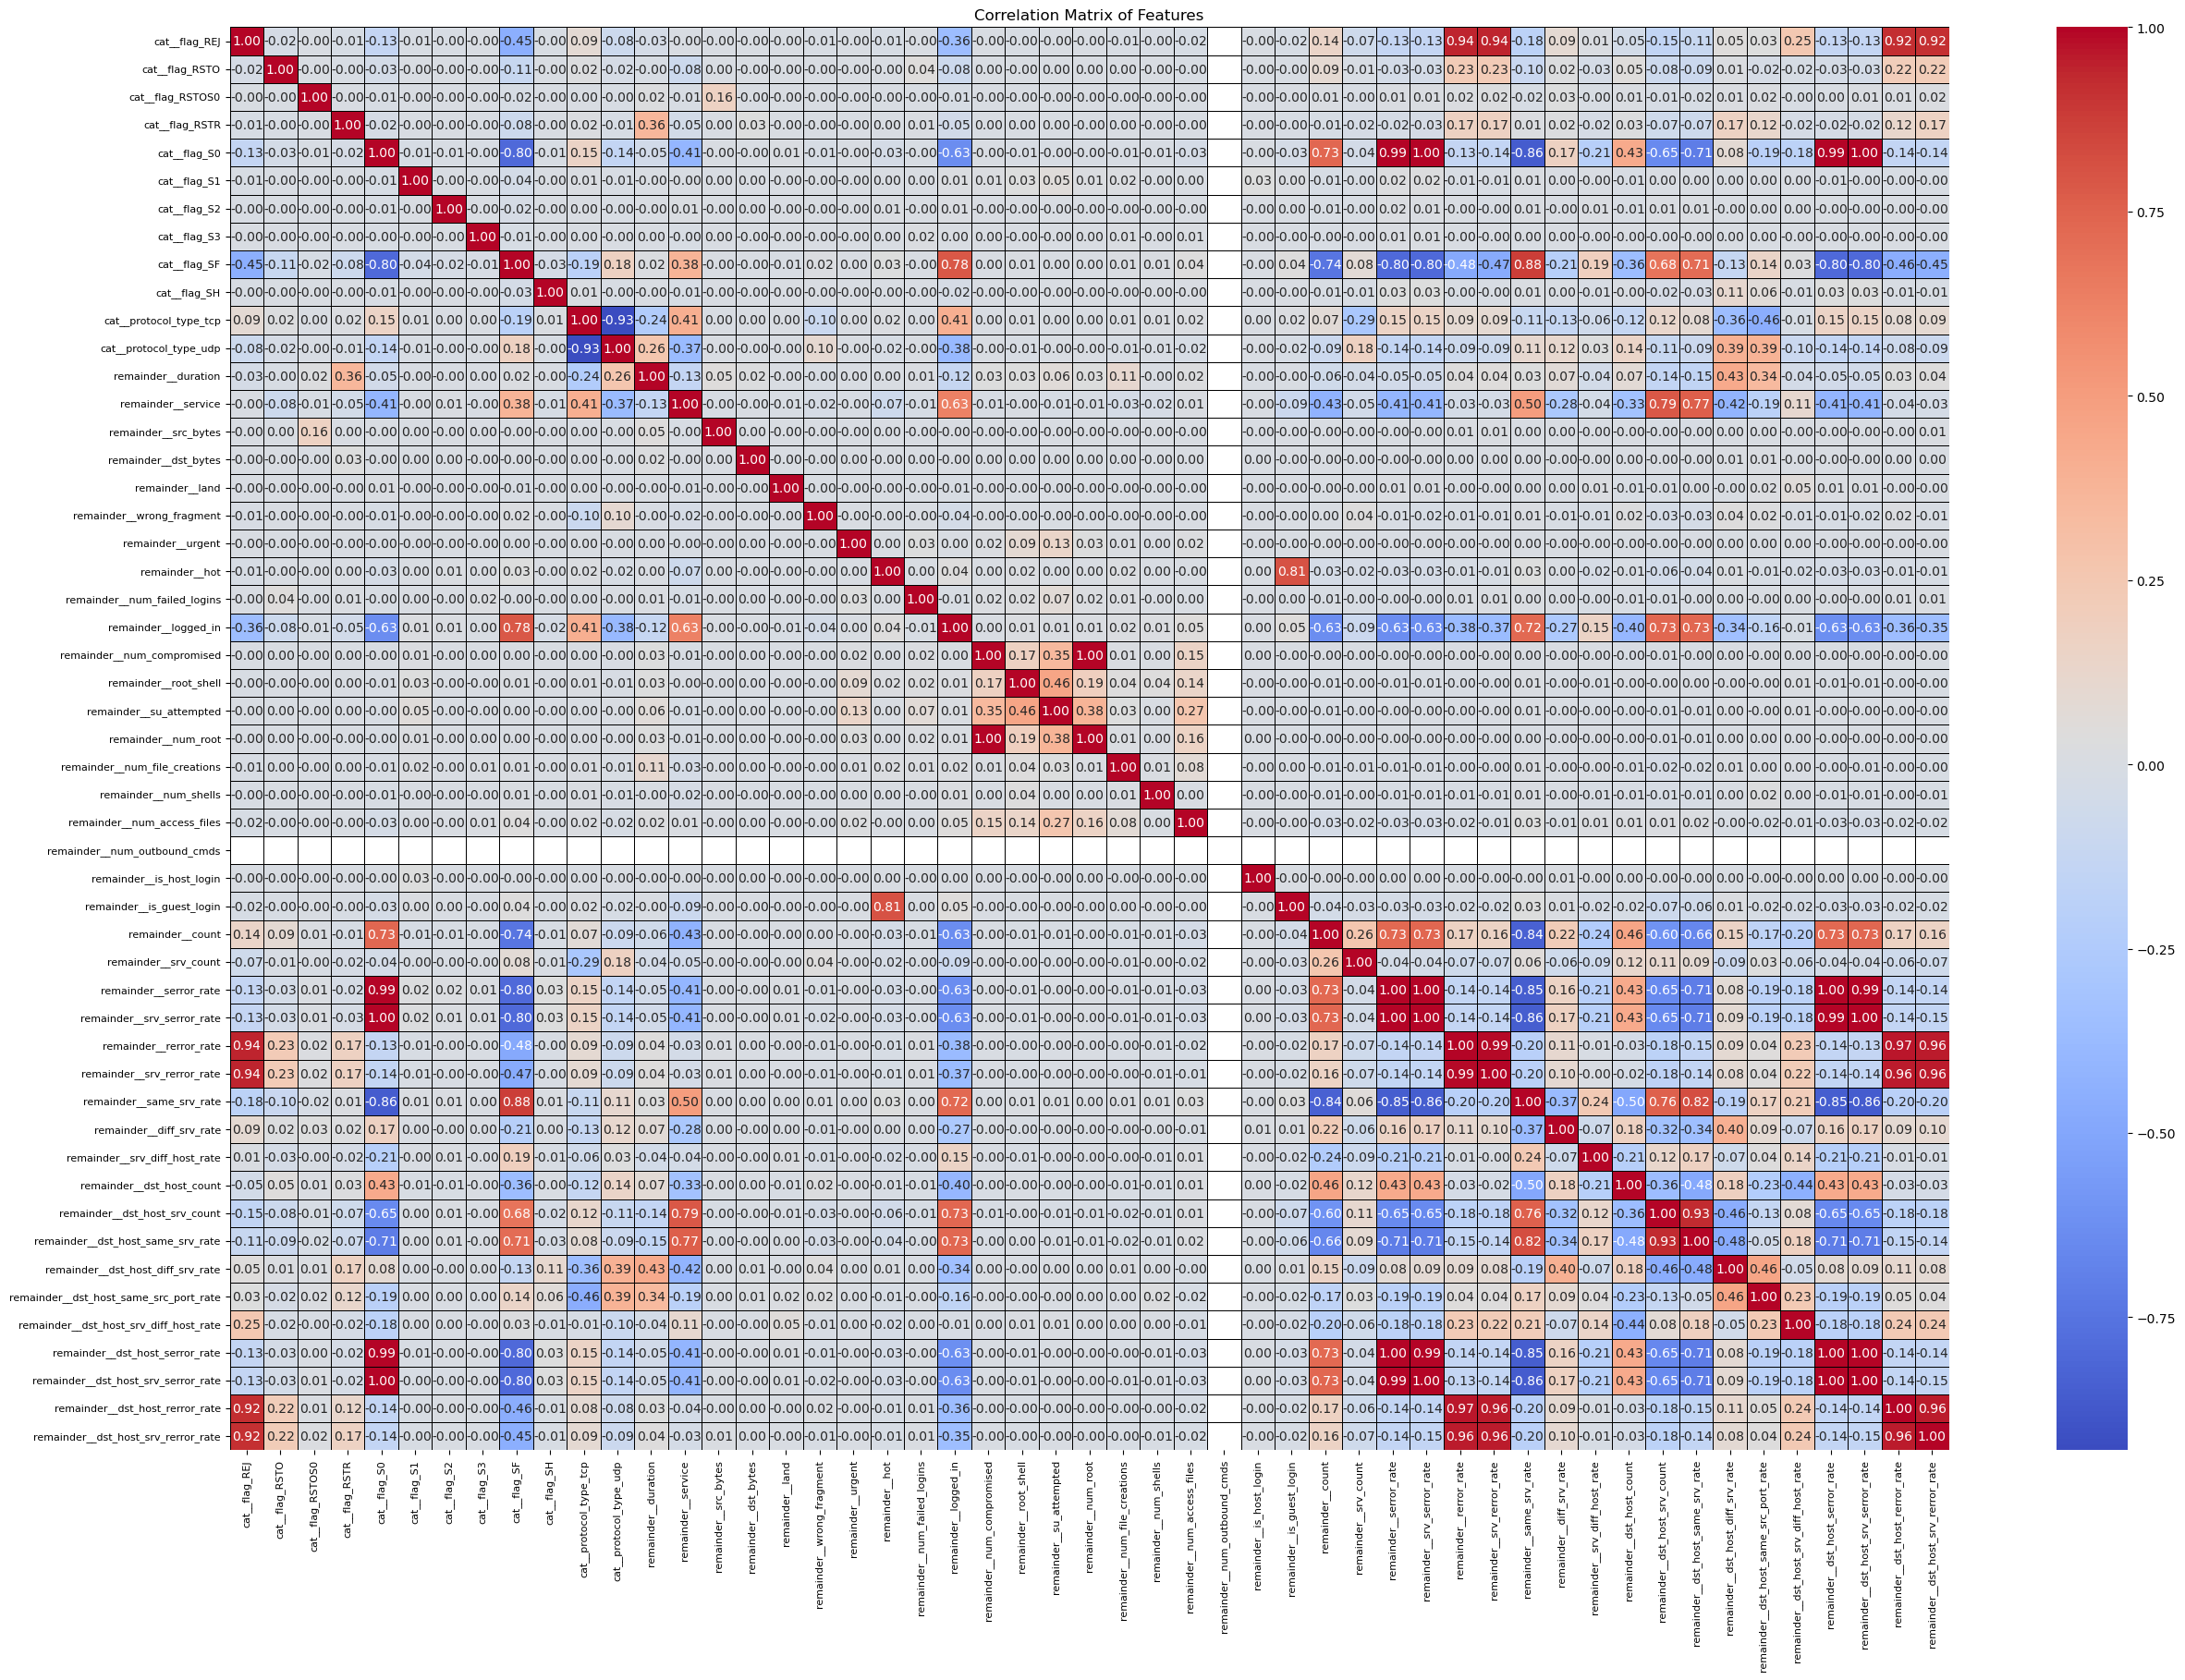

In [59]:
#Calculate the correlation matrix using the original data 
correlation_matrix = X_encoded_df.corr()

# Draw correlation matrix using heatmap
plt.figure(figsize=(30, 20))  

# Use heatmap to plot correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            linewidths=0.5, linecolor='black', cbar=True)

plt.title("Correlation Matrix of Features")
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)               
plt.show()


In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

In [27]:
# Training and evaluation of several classification models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model using the training data
    model.fit(X_train, y_train)
    
    # Predict on training data
    y_train_pred = model.predict(X_train)
    # Calculate training accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Predict on testing data
    y_test_pred = model.predict(X_test)
    # Calculate testing accuracy
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print("="*50)
    print(f"{model_name} Training Accuracy: {train_accuracy}")
    print(f"{model_name} Testing Accuracy: {test_accuracy}")
    print("="*50)
    
    # Print confusion matrix and classification report
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Decision Tree Training Accuracy: 0.999989368671868
Decision Tree Testing Accuracy: 0.999696122146494
Confusion Matrix:
 [[316483     10     16     17]
 [    13   1280      4      0]
 [    18      4   4550      2]
 [    13      1      0     87]]
Random Forest Training Accuracy: 0.999989368671868
Random Forest Testing Accuracy: 0.9997922467736234
Confusion Matrix:
 [[316515      2      3      6]
 [    15   1277      5      0]
 [    22      1   4551      0]
 [    13      0      0     88]]
Naive Bayes Training Accuracy: 0.9620395139888345
Naive Bayes Testing Accuracy: 0.9623036421931299
Confusion Matrix:
 [[309466    104   2153   4803]
 [   994      0     27    276]
 [  3188      0    827    559]
 [    53      0      0     48]]


C:\Users\X\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Training Accuracy: 0.9809845407199801
Logistic Regression Testing Accuracy: 0.9810944563997296
Confusion Matrix:
 [[316292      0    234      0]
 [  1283      0     14      0]
 [  4465      0    109      0]
 [    99      0      2      0]]


C:\Users\X\anaconda4\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\X\anaconda4\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


K-Nearest Neighbors Training Accuracy: 0.998680386395621
K-Nearest Neighbors Testing Accuracy: 0.9983317726001402
Confusion Matrix:
 [[316468     14     30     14]
 [    20   1135    142      0]
 [   255     50   4269      0]
 [    12      0      1     88]]


In [ ]:
###NOTTT>>> I try to make the tranning out the loop but take time more than 12h and no result
# Define the SVC model
svc_model = SVC()
svc_model.fit(X_train, y_train)

# Predict on training data
svc_train_pred = svc_model.predict(X_train)
train_accuracy = accuracy_score(y_train, svc_train_pred)

# Predict on test data
svc_test_pred = svc_model.predict(X_test)
test_accuracy = accuracy_score(y_test, svc_test_pred)

# Print training and testing accuracy
print("=" * 50)
print("Support Vector Classifier Training Accuracy:", train_accuracy)
print("Support Vector Classifier Testing Accuracy:", test_accuracy)
print("=" * 50)

# Print confusion matrix for test data
print("Confusion Matrix for Support Vector Classifier on Test Data:\n", confusion_matrix(y_test, svc_test_pred))


###Note:

When running the Support Vector Classifier (SVC) model without using the StandardScaler for data normalization, the training process took an extremely long time due to the impact of unscaled values on the model's efficiency. After applying the StandardScaler to standardize the data, the performance significantly improved in terms of both execution speed and accuracy of the results.

In [32]:
###NOTTT>>> I try to make the tranning on part from data the max iter was 1000 but got bad accuracy


svc_model = SVC(kernel='linear', max_iter=1000, probability=False)

svc_model.fit(X_train, y_train)

svc_train_pred = svc_model.predict(X_train)
train_accuracy = accuracy_score(y_train, svc_train_pred)

svc_test_pred = svc_model.predict(X_test)
test_accuracy = accuracy_score(y_test, svc_test_pred)

print("=" * 50)
print("Support Vector Classifier Training Accuracy:", train_accuracy)
print("Support Vector Classifier Testing Accuracy:", test_accuracy)
print("=" * 50)

print("Confusion Matrix for Support Vector Classifier on Test Data:\n", confusion_matrix(y_test, svc_test_pred))


C:\Users\X\anaconda4\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Support Vector Classifier Training Accuracy: 0.01426059777300254
Support Vector Classifier Testing Accuracy: 0.014176832104385143
Confusion Matrix for Support Vector Classifier on Test Data:
 [[     0      2 316524      0]
 [     0      0   1297      0]
 [     2      0   4572      0]
 [     0      0    101      0]]


In [52]:
#NOT>>>>> I try svc model out loop to see there is a diff or


# Create a StandardScaler to normalize the data
scaler = StandardScaler()

# Apply the scaler to the training and testing data
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)  # Only transform test data (to avoid data leakage)

# Initialize the Support Vector Classifier (SVC) model
svc = SVC(max_iter=1000)

# Train the model on the scaled training data
svc.fit(X_train_scaled, y_train)

# Predict on the training data and calculate the training accuracy
y_train_pred = svc.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test data and calculate the test accuracy
y_test_pred = svc.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the training and testing accuracies
print("="*50)
print(f"SVC Training Accuracy after Scaling: {train_accuracy}")
print(f"SVC Testing Accuracy after Scaling: {test_accuracy}")
print("="*50)

# Print the confusion matrix for the model on the test data
print("Confusion Matrix for Support Vector Classifier on Test Data:\n", confusion_matrix(y_test, y_test_pred))

C:\Users\X\anaconda4\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC Training Accuracy after Scaling: 0.9991441780853776
SVC Testing Accuracy after Scaling: 0.9989953426067758
Confusion Matrix for Support Vector Classifier on Test Data:
 [[316408     61     52      5]
 [    59   1228     10      0]
 [   105     15   4454      0]
 [    17      0      0     84]]


In [53]:
# Create a StandardScaler to normalize the data
scaler = StandardScaler()

# Dictionary containing models for classification
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Scale the training and testing data using StandardScaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train the model using the scaled training data
    model.fit(X_train_scaled, y_train)
    
    # Predict on training data and calculate training accuracy
    y_train_pred = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Predict on test data and calculate test accuracy
    y_test_pred = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Print training and test accuracy
    print("="*50)
    print(f"{model_name} Training Accuracy: {train_accuracy}")
    print(f"{model_name} Testing Accuracy: {test_accuracy}")
    print("="*50)
    
    # Print confusion matrix for the model on test data
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Decision Tree Training Accuracy: 0.999989368671868
Decision Tree Testing Accuracy: 0.9996806181743763
Confusion Matrix:
 [[316476     15     18     17]
 [    12   1281      4      0]
 [    20      4   4548      2]
 [    10      1      0     90]]
Random Forest Training Accuracy: 0.999989368671868
Random Forest Testing Accuracy: 0.9997922467736234
Confusion Matrix:
 [[316515      2      3      6]
 [    15   1277      5      0]
 [    22      1   4551      0]
 [    13      0      0     88]]
Naive Bayes Training Accuracy: 0.20987437756896077
Naive Bayes Testing Accuracy: 0.2094090505987634
Confusion Matrix:
 [[ 62892 220258  30615   2761]
 [     1   1295      1      0]
 [     2   1247   3319      6]
 [     2     66      5     28]]
Logistic Regression Training Accuracy: 0.9931148861185419
Logistic Regression Testing Accuracy: 0.9932154618013135
Confusion Matrix:
 [[316183    130    205      8]
 [   699    577     21      0]
 [  1095     14   3464      1]
 [    14      1      0     86]]
K-Nea

In [56]:
# Normalize the training data only once
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary containing models for classification with optimized parameters
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),  # Lower n_estimators for speed
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=500),  # Reduced max_iter for faster convergence
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),  # Default or optimal k if known
    'Support Vector Classifier': SVC(max_iter=500)  # Reduced max_iter for faster convergence
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model using the scaled training data
    model.fit(X_train_scaled, y_train)
    
    # Predict on training data and calculate training accuracy
    y_train_pred = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Predict on test data and calculate test accuracy
    y_test_pred = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Print training and test accuracy
    print("="*50)
    print(f"{model_name} Training Accuracy: {train_accuracy}")
    print(f"{model_name} Testing Accuracy: {test_accuracy}")
    print("="*50)
    
    # Print confusion matrix for the model on test data
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Decision Tree Training Accuracy: 0.999989368671868
Decision Tree Testing Accuracy: 0.9996744165855292
Confusion Matrix:
 [[316475     14     20     17]
 [    16   1276      5      0]
 [    17      3   4553      1]
 [    11      1      0     89]]
Random Forest Training Accuracy: 0.9999880397558516
Random Forest Testing Accuracy: 0.9997829443903528
Confusion Matrix:
 [[316514      3      3      6]
 [    14   1278      5      0]
 [    24      1   4549      0]
 [    13      0      1     87]]
Naive Bayes Training Accuracy: 0.20987437756896077
Naive Bayes Testing Accuracy: 0.2094090505987634
Confusion Matrix:
 [[ 62892 220258  30615   2761]
 [     1   1295      1      0]
 [     2   1247   3319      6]
 [     2     66      5     28]]
Logistic Regression Training Accuracy: 0.9931148861185419
Logistic Regression Testing Accuracy: 0.9932154618013135
Confusion Matrix:
 [[316183    130    205      8]
 [   699    577     21      0]
 [  1095     14   3464      1]
 [    14      1      0     86]]
K-Ne

C:\Users\X\anaconda4\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Support Vector Classifier Training Accuracy: 0.9974006402717367
Support Vector Classifier Testing Accuracy: 0.9972433937574806
Confusion Matrix:
 [[316297    200     24      5]
 [   355    932     10      0]
 [   253     25   4296      0]
 [    17      0      0     84]]
